# Übungen zu Ensemble Methoden

## Aufgabe 1  (Theorie)

1) Was ist das Ziel  des Boosting Algorithmus?

Das Ziel des Boosting Algorithmus ist den Bias zu verringern.<br>
Vorgegeben ist eine Reihe von Objekten und eine Reihe schwacher Klassifikatoren. Gesucht ist ein Klassifikator, der die Objekte möglichst fehlerfrei in zwei Klassen einteilt. Boosting kombiniert die vorhandenen schwachen Klassifikatoren so, dass der entstehende neue Klassifikator möglichst wenige Fehler macht.

2) Was versteht man unter `Bootstrapping` und wo wird es benötig? 

Bootstrapping bedeutet, dass je Ziehung aus der gegebenen Stichprobe ein Wert mit Zurücklegen gezogen wird. Es ist eine der wichtigsten Ideen hinter Bagging (was für Bootstrap AGGregatING steht).Und es wird verwendet, um viele verschiedene, zufällig erzeugte Bäume zu erstellen.

3) Was verteht man unter `Konfusionsmatrix` ?

Eine Konfusionsmatrix zeigt wie viele Beobactungen der Vorhersage richtig bzw. falsch angeordnet wurden im Vergleich zu den tarschächlichen Werten. <br>
z.B Für 30 Männer die einen Erfolg hatten, wurde richtigerweise auch ein Erfolg vorhergesagt.

Für 6 Männer, die ein Korb hatten wurde fälschicherweise ein Erfolg vorhergesagt. usw.

## Aufgabe 2 : Random Forest 

Für diese Aufgabe benötigen Sie den Datensatz über Herzerkrankungen von dem UCI machine learning repository.  
Url für den Datasatz: http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Informationen über den Datasatz: http://archive.ics.uci.edu/ml/datasets/Heart+Disease

### 2.1 Daten bearbeiten

1) Betrachten Sie die ersten Zeilen des Datensatzes. Benennen Sie sinnvoll die Variablen um, mit Hilfe der oben angegebenen Seite.

2) Geben Sie die Struktur des Datensatzes aus. Falls es Missings gibt (?), ersetzen Sie die mit "NA". Konvertieren Sie Variablen, die tatsächlich Faktoren sind, jedoch im Datensatz numerische Datentypen sind, in Faktoren um und überprüfen Sie, ob alles geklappt hat. <br>

**Hinweis Nr.1 :** Für die Variable "Sex" müssen Sie erst eine ifelse-Methode benutzen wie folgt : `data$sex <- ifelse(test=data$sex ==0, yes="F", no= "M")` und dann in den Faktor konvertieren. Die gleiche Methode wird auch bei der Variable "num"(diagnosis of heart disease) benötigt. Vergeben Sie die zwei Werte : Healthy & Unhealthy

**Hinweis Nr.2 :** Variablen die ein "NA" enthalten, müssen erst als integer definiert werden und dann als Faktoren
### 2.2 Random Forest bilden. 

1) Library(randomForest) und set.seed(42) einfügen,dass jeder den gleichen Random Forest generiert. <br>
2) Erst müssen Sie für die "NA"s  mit Hilfe der [rfImpute](https://www.rdocumentation.org/packages/randomForest/versions/4.6-14/topics/rfImpute) function Werte angeben. 

3) `num` ist die Variable, die der Random Forest vorhersagen soll. Legen Sie die Anzahl von Iterationen gleich 6 fest. Jetzt können Sie einen Random Forest mit 300 Bäume generieren.

4) Intepretieren Sie den Wert von `OOB estimate of  error rate` und berechnen Sie den Durchschnitt des OOB- Fehlerschätzers. Was verstehen Sie unter diesem Wert? 

5) Zeigen Sie welche Variablen am wichtigsten sind.

6) Ist die Anzahl von Bäumen eine gute Anzahl für unseren Datensatz?

### Lösung

1)

In [22]:
# Datensatz einlesen
url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
 
data <- read.csv(url, header=FALSE)

In [2]:
#Erste sechs Zeilen anzeigen
head(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [3]:
# Labels vergeben 
# Kommentare von "http://archive.ics.uci.edu/ml/datasets/Heart+Disease"
colnames(data) <- c(
  "age",
  "sex",# 0 = female, 1 = male
  "cp", # chest pain
          # 1 = typical angina,
          # 2 = atypical angina,
          # 3 = non-anginal pain,
          # 4 = asymptomatic
  "trestbps", # resting blood pressure (in mm Hg)
  "chol", # serum cholestoral in mg/dl
  "fbs",  # fasting blood sugar greater than 120 mg/dl, 1 = TRUE, 0 = FALSE
  "restecg", # resting electrocardiographic results
          # 1 = normal
          # 2 = having ST-T wave abnormality
          # 3 = showing probable or definite left ventricular hypertrophy
  "thalach", # maximum heart rate achieved
  "exang",   # exercise induced angina, 1 = yes, 0 = no
  "oldpeak", # ST depression induced by exercise relative to rest
  "slope", # the slope of the peak exercise ST segment
          # 1 = upsloping
          # 2 = flat
          # 3 = downsloping
  "ca", # number of major vessels (0-3) colored by fluoroscopy
  "thal", # this is short of thalium heart scan
          # 3 = normal (no cold spots)
          # 6 = fixed defect (cold spots during rest and exercise)
          # 7 = reversible defect (when cold spots only appear during exercise)
  "num" # (the predicted attribute) - diagnosis of heart disease
          # 0 if less than or equal to 50% diameter narrowing
          # 1 if greater than 50% diameter narrowing
  )

In [4]:
#Datensatz anschauen mit neuen Labels
data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


2)

In [6]:
# Struktur des Datensatzes
str(data) 
# ca und thal enthalten Missings "?" 
# sex, cp, fbs, restecg, exang, slope, ca, thal und num sollten Faktoren sein.

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : num  1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : num  1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : num  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : num  2 2 2 0 2 0 2 0 2 2 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : num  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : num  3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 5 levels "?","0.0","1.0",..: 2 5 4 2 2 2 4 2 3 2 ...
 $ thal    : Factor w/ 4 levels "?","3.0","6.0",..: 3 2 4 2 2 2 2 2 4 4 ...
 $ num     : int  0 2 1 0 0 0 3 0 2 1 ...


In [9]:
# Missings mit "NA" ersetzen.
data[data == "?"] <- NA
# Faktoren setzen
data$sex <- ifelse(test=data$sex ==0, yes="F", no= "M")

data$sex <- as.factor(data$sex)
 
data$cp <- as.factor(data$cp)
data$fbs <- as.factor(data$fbs)
data$restecg <- as.factor(data$restecg)
data$exang <- as.factor(data$exang)
data$slope <- as.factor(data$slope)
 
data$ca <- as.integer(data$ca) # Wir haben hier die "?" mit "NA" ersetzt.
                               #  R denkt jetzt, dass die "Levels" für den Faktor
                               # von Typ string sind, aber wir wissen, dass die 
                               # integers sind. So muss man erst die Strings als                               # convert the strings to integiers...
data$ca <- as.factor(data$ca)  # integers definieren und dann als Faktor.
 
data$thal <- as.integer(data$thal) # ..."thal" hatte auch "?"
data$thal <- as.factor(data$thal)
 
## Die nächsten Zeilen ersetzen 0 und 1 mit "Healthy" und "Unhealthy"

data$num <- ifelse(test=data$num == 0, yes="Healthy", no="Unhealthy")
data$num <- as.factor(data$num) # Now convert to a factor


In [10]:
#Datensatz anschauen und überprüfen, ob alles gut gelaufen ist.
data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
63,M,1,145,233,1,2,150,0,2.3,3,1,2,Healthy
67,M,4,160,286,0,2,108,1,1.5,2,4,1,Unhealthy
67,M,4,120,229,0,2,129,1,2.6,2,3,3,Unhealthy
37,M,3,130,250,0,0,187,0,3.5,3,1,1,Healthy
41,M,2,130,204,0,2,172,0,1.4,1,1,1,Healthy
56,M,2,120,236,0,0,178,0,0.8,1,1,1,Healthy
62,M,4,140,268,0,2,160,0,3.6,3,3,1,Unhealthy
57,M,4,120,354,0,0,163,1,0.6,1,1,1,Healthy
63,M,4,130,254,0,2,147,0,1.4,2,2,3,Unhealthy
53,M,4,140,203,1,2,155,1,3.1,3,1,3,Unhealthy


In [11]:
#Überprüfung von Faktoren.
str(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : Factor w/ 1 level "M": 1 1 1 1 1 1 1 1 1 1 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 4 levels "1","2","3","4": 1 4 3 1 1 1 3 1 2 1 ...
 $ thal    : Factor w/ 3 levels "1","2","3": 2 1 3 1 1 1 1 1 3 3 ...
 $ num     : Factor w/ 2 levels "Healthy","Unhealthy": 1 2 2 1 1 1 2 1 2 2 ...


#### 2.2 
1)

In [21]:
#Random Forest Bibliotheken einfügen.
library(randomForest) 
set.seed(42)

2)

In [14]:
#Fehlende Werte im Trainingsdatensatz unter Verwendung von Ähnlichkeiten (proximities) imputieren.
data.imputed <- rfImpute(num ~ ., data = data,ntree=300, iter=6)
#iter = Anzahl von Iterationen

ntree      OOB      1      2
  300:  17.82% 14.02% 22.30%
ntree      OOB      1      2
  300:  18.81% 14.02% 24.46%
ntree      OOB      1      2
  300:  19.47% 14.63% 25.18%
ntree      OOB      1      2
  300:  18.15% 12.20% 25.18%
ntree      OOB      1      2
  300:  18.48% 14.63% 23.02%
ntree      OOB      1      2
  300:  17.49% 12.80% 23.02%


3)

In [16]:
# Random Forest bilden mit "num" als Prädiktor , data.imputed als unser Trainingdatensatz, 
# importance=TRUE lässt danach die Wichtigkeiten der Variablen berechnen, mtry=3 3 Variablen werden für 
# Baum zufällig ausgewählt, ntree Anzahl der Bäumen,replace mit zurücklegen, do.trace output anzeigen 
model <- randomForest(num ~ ., data=data.imputed, importance=TRUE, mtry=3,ntree=300,
                     replace=TRUE, do.trace=TRUE)

ntree      OOB      1      2
    1:  28.70% 27.59% 30.00%
    2:  25.28% 20.00% 31.33%
    3:  25.91% 20.51% 32.04%
    4:  27.60% 21.97% 33.90%
    5:  30.37% 24.65% 36.72%
    6:  27.37% 22.37% 33.08%
    7:  26.62% 18.24% 36.57%
    8:  24.58% 19.25% 30.88%
    9:  23.75% 19.75% 28.47%
   10:  24.75% 19.14% 31.39%
   11:  23.33% 16.67% 31.16%
   12:  23.18% 19.02% 28.06%
   13:  23.51% 18.40% 29.50%
   14:  21.45% 16.46% 27.34%
   15:  22.44% 18.90% 26.62%
   16:  22.44% 16.46% 29.50%
   17:  22.11% 17.07% 28.06%
   18:  24.42% 20.12% 29.50%
   19:  23.10% 16.46% 30.94%
   20:  21.45% 16.46% 27.34%
   21:  20.13% 14.02% 27.34%
   22:  22.44% 16.46% 29.50%
   23:  20.46% 15.24% 26.62%
   24:  19.47% 14.02% 25.90%
   25:  19.47% 13.41% 26.62%
   26:  19.14% 14.02% 25.18%
   27:  18.48% 12.80% 25.18%
   28:  19.47% 14.63% 25.18%
   29:  19.80% 13.41% 27.34%
   30:  19.14% 14.02% 25.18%
   31:  18.81% 13.41% 25.18%
   32:  18.81% 14.02% 24.46%
   33:  19.80% 15.24% 25.18%
   34:  19.80%

4)

In [17]:
model


Call:
 randomForest(formula = num ~ ., data = data.imputed, importance = TRUE,      mtry = 3, ntree = 300, replace = TRUE, do.trace = TRUE) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 3

        OOB estimate of  error rate: 18.15%
Confusion matrix:
          Healthy Unhealthy class.error
Healthy       142        22   0.1341463
Unhealthy      33       106   0.2374101

Der OOB Fehlerschätzer liegt bei 16.2%. Das heißt, 83.8% der Beobactungen wurden richtig klassifiziert.

In [18]:
model$oob.times
mean(model$oob.times)

[1]  97 123 114 112  99 118 110 116 117 116 104 118 111  95 111 109 118 116
 [19] 106 107 109 121 108 111 119 111 110 112 112 120 110 107 112 106 114 112
 [37] 105 101 114  91 115  99 105 111 112 109 115 114 121 115 112 110 108 131
 [55] 111 118 105 120 126 105  95  92 117 118 114 108 111  98 105 114 106 118
 [73] 114 113 111 123 106 107  94 108 115 101 106 113  97 117 120 110 103 112
 [91] 102 109 105 120 105 115 111 102 115 108 116 109 117 112 101 129 112 103
[109]  87 116 118 103 112 108 108 115 126 101  94  97 103 101 115 105 102 107
[127] 108 106 102 115 106 101  96 115 113  94 119 110 119 101 112 106 117 106
[145] 134 111 113 131  97 109 111 116 119 107  95 114 102 104 119 104  94 120
[163] 113 114 101 111 117 111 105 109 104 108 106 104 107 114 105 109 118 120
[181] 115 115  96 113 110 111 117  92 125 113 103 117 108 100  93 102 105 113
[199]  99 112 110 105 132 102 110 123 119 107 109 114 115 106 117 108 114 110
[217] 111  96  99 109 106 110 106 117 112 106 102 109 102 114 116 124  95  98
[235] 105 116 124  99 117 110  93 121 105 104 112 101 111 120  99 102 125  99
[253] 137 129 106 114 111 115 107  82 115  97 130 104 102 113 117 109  98 114
[271] 106 109 126 116 109 115 120  94 109 117 109 109 110 104 114 110 109 108
[289] 106  93 105 110 115 111 119 111 108 110  96 121 112 112 115

[1] 109.8152

Es wird ein OOB-Durchschnitt von 110 angerechnet.
Das heißt ca. 110 Mal wurde ein Patient nicht für die Erstellung eines Baumes ausgewählt.

,MeanDecreaseAccuracy,MeanDecreaseGini
age,6.2353668,13.133638
sex,0.0000000,0.000000
cp,16.9776661,20.827893
trestbps,3.1949736,11.071687
chol,-0.8198355,12.527539
fbs,-0.1220167,1.121739
restecg,-0.5167426,2.915857
thalach,5.4996904,17.208303
exang,7.6480776,8.005236
oldpeak,12.3560482,15.730045


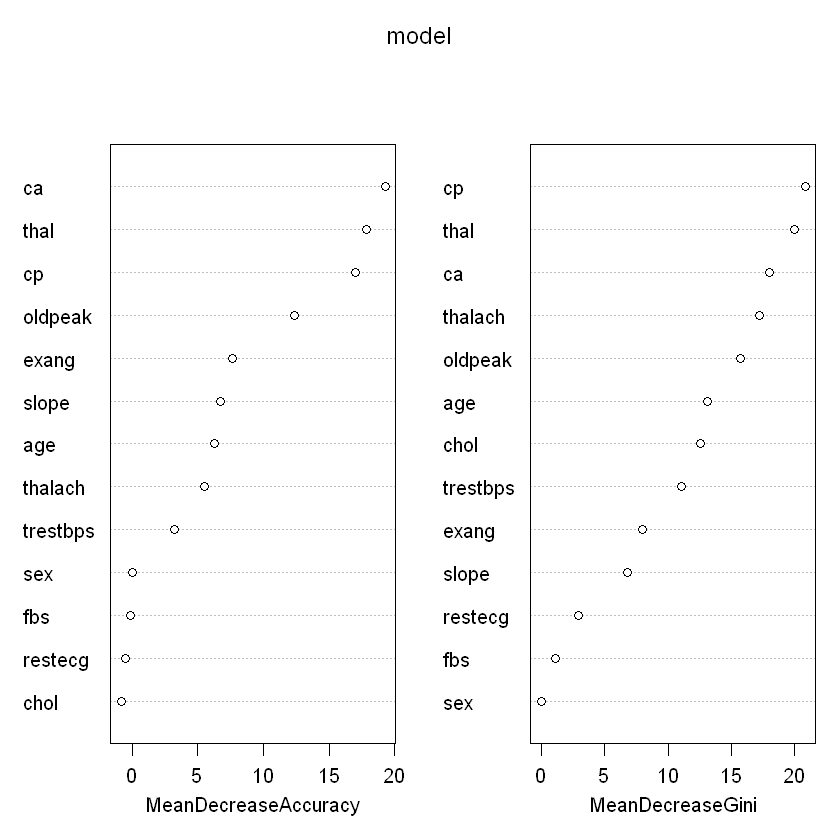

In [19]:
#Variablenwichtigkeit
imp <- varImpPlot(model)
imp

6)

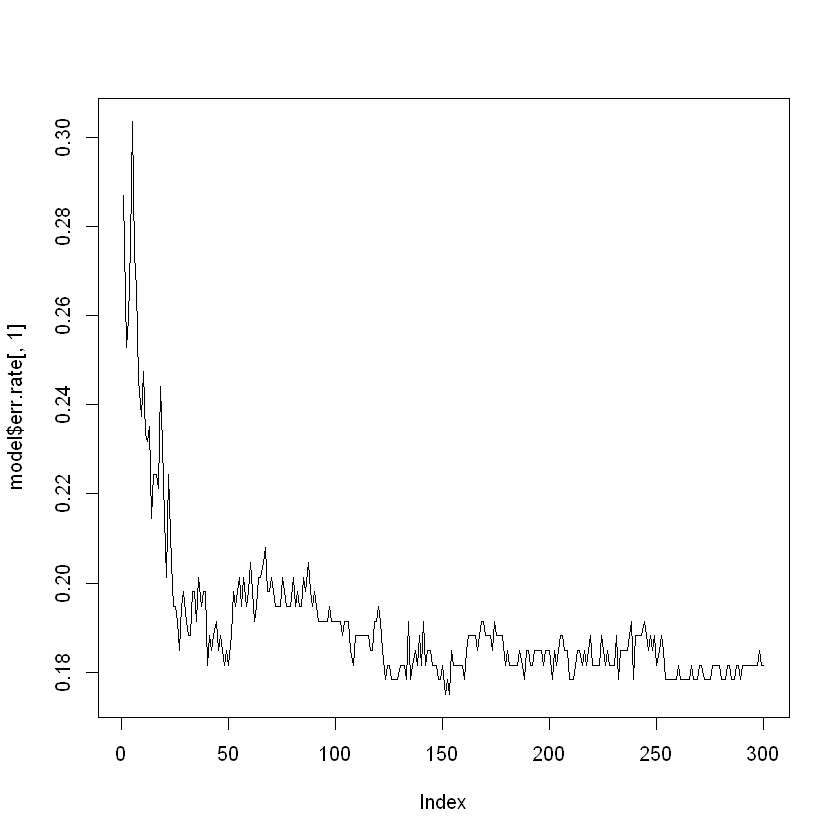

In [20]:
# Diagramm darstellen um zu sehen, ob die Anzahl von Bäumen eine gute Anzahl 
#für unseren Random Forest ist.
plot(model$err.rate[,1], type="l")

300 Bäume ist eine gute Anzahl von Bäumen für unseren Random Forest, da der OOB-Fehler einigermaßen stabil bleibt und sehr niedrig ist. Man kann auch sagen, dass 100 Bäume auch eine gute Anzahl von Bäumen wäre, da sich der OOB- Fehler nach den 100 Bäume nicht groß ändert und niedrig bleibt.